<a href="https://colab.research.google.com/github/Satgrays/Dataneros/blob/main/Datathon_2024_fer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Pip Installs

# Modelo de prediccion de volumen de pasajeros

In [2]:
# Librerías
#from google.colab import drive
#drive.mount('/content/drive')

KeyboardInterrupt: 

In [1]:
import pandas as pd
import gdown
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import linear_model
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_absolute_error, mean_squared_error



# Base de datos de vuelos


In [2]:
#https://drive.google.com/file/d/1QEJddcuE3mJRXSPllMxomuzz4lQJy99n/view

# ID del archivo Flights
Flights_id = '1QEJddcuE3mJRXSPllMxomuzz4lQJy99n'

# Enlace de descarga del archivo Flights
Flights_url = f'https://drive.google.com/uc?id={Flights_id}'

# Descarga el archivo CSV a la ubicación local Flights
output_Flights = '/content/archivo.csv'
gdown.download(Flights_url, output_Flights, quiet=False)

# Lee el archivo CSV con pandas
Flights = pd.read_csv(output_Flights)

# Muestra las primeras filas del DataFrame
print(Flights.head())

Downloading...
From: https://drive.google.com/uc?id=1QEJddcuE3mJRXSPllMxomuzz4lQJy99n
To: /content/archivo.csv
100%|██████████| 30.2M/30.2M [00:00<00:00, 83.6MB/s]


                          Flight_ID Aeronave DepartureStation ArrivalStation  \
0  ab954014077430bd842cfa305a55c0f8   XA-VBY               AT             AZ   
1  efd86c996035dacdca7a0ccb2560dda1   XA-VIX               BM             AV   
2  6cfa1bbaa44f08fc7d3061f034a6a5ce   XA-VBV               AW             AS   
3  dd0fad3248951d2f71d63e6279aeaa4b   XA-VBW               AW             AS   
4  d0987ee648eea254063bfe2b39571b67   XA-VAP               BA             AB   

      Destination_Type        Origin_Type                  STD  \
0    Ciudad Fronteriza   Ciudad Principal  2023-10-19 11:40:00   
1  MX Amigos y Familia  Ciudad Fronteriza  2023-07-03 00:55:00   
2  MX Amigos y Familia   Ciudad Principal  2024-02-16 17:10:00   
3  MX Amigos y Familia   Ciudad Principal  2023-06-26 15:15:00   
4                Playa   Ciudad Principal  2023-02-10 08:40:00   

                   STA  Capacity  Passengers  Bookings  
0  2023-10-19 14:25:00       240       229.0     157.0  
1  2023-

In [3]:
Flights.head()

,Flight_ID,Aeronave,DepartureStation,ArrivalStation,Destination_Type,Origin_Type,STD,STA,Capacity,Passengers,Bookings
0,ab954014077430bd842cfa305a55c0f8,XA-VBY,AT,AZ,Ciudad Fronteriza,Ciudad Principal,2023-10-19 11:40:00,2023-10-19 14:25:00,240,229.0,157.0
1,efd86c996035dacdca7a0ccb2560dda1,XA-VIX,BM,AV,MX Amigos y Familia,Ciudad Fronteriza,2023-07-03 00:55:00,2023-07-03 04:55:00,186,197.0,109.0
2,6cfa1bbaa44f08fc7d3061f034a6a5ce,XA-VBV,AW,AS,MX Amigos y Familia,Ciudad Principal,2024-02-16 17:10:00,2024-02-16 17:55:00,220,NaN,NaN
3,dd0fad3248951d2f71d63e6279aeaa4b,XA-VBW,AW,AS,MX Amigos y Familia,Ciudad Principal,2023-06-26 15:15:00,2023-06-26 15:55:00,220,200.0,142.0
4,d0987ee648eea254063bfe2b39571b67,XA-VAP,BA,AB,Playa,Ciudad Principal,2023-02-10 08:40:00,2023-02-10 09:50:00,186,162.0,90.0


# Explorar Flights

In [4]:
# Verifica los tipos de datos y un resumen estadístico del DataFrame 'Sales'
print(Flights.info())
print(Flights.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245753 entries, 0 to 245752
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Flight_ID         245753 non-null  object 
 1   Aeronave          165363 non-null  object 
 2   DepartureStation  245752 non-null  object 
 3   ArrivalStation    245752 non-null  object 
 4   Destination_Type  245752 non-null  object 
 5   Origin_Type       245752 non-null  object 
 6   STD               245753 non-null  object 
 7   STA               245753 non-null  object 
 8   Capacity          245753 non-null  int64  
 9   Passengers        122228 non-null  float64
 10  Bookings          122228 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 20.6+ MB
None
            Capacity     Passengers       Bookings
count  245753.000000  122228.000000  122228.000000
mean      204.426314     183.686782     113.830857
std        25.649132      37.659902      30.

In [5]:
print(Flights.isnull().sum())

Flight_ID                0
Aeronave             80390
DepartureStation         1
ArrivalStation           1
Destination_Type         1
Origin_Type              1
STD                      0
STA                      0
Capacity                 0
Passengers          123525
Bookings            123525
dtype: int64


In [6]:
# Eliminar filas con valores nulos
Flights = Flights.dropna()
Flights.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121724 entries, 0 to 245750
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Flight_ID         121724 non-null  object 
 1   Aeronave          121724 non-null  object 
 2   DepartureStation  121724 non-null  object 
 3   ArrivalStation    121724 non-null  object 
 4   Destination_Type  121724 non-null  object 
 5   Origin_Type       121724 non-null  object 
 6   STD               121724 non-null  object 
 7   STA               121724 non-null  object 
 8   Capacity          121724 non-null  int64  
 9   Passengers        121724 non-null  float64
 10  Bookings          121724 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 11.1+ MB


<Axes: >

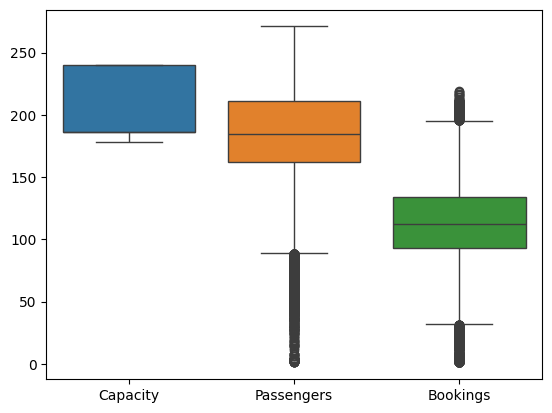

In [7]:
sns.boxplot(Flights)

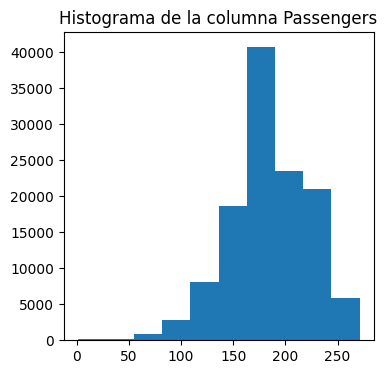

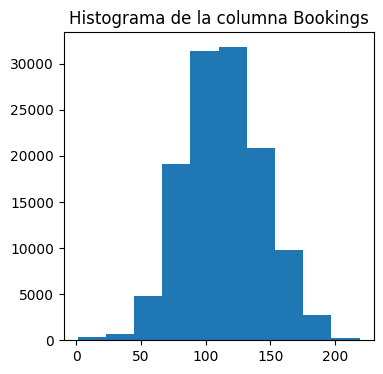

In [8]:
for column in Flights.select_dtypes(exclude=['object',"int"]).columns:
  plt.figure(figsize=(4,4))
  plt.hist(Flights[column])
  plt.title(f"Histograma de la columna {column}")


In [9]:
Flights

,Flight_ID,Aeronave,DepartureStation,ArrivalStation,Destination_Type,Origin_Type,STD,STA,Capacity,Passengers,Bookings
0,ab954014077430bd842cfa305a55c0f8,XA-VBY,AT,AZ,Ciudad Fronteriza,Ciudad Principal,2023-10-19 11:40:00,2023-10-19 14:25:00,240,229.0,157.0
1,efd86c996035dacdca7a0ccb2560dda1,XA-VIX,BM,AV,MX Amigos y Familia,Ciudad Fronteriza,2023-07-03 00:55:00,2023-07-03 04:55:00,186,197.0,109.0
3,dd0fad3248951d2f71d63e6279aeaa4b,XA-VBW,AW,AS,MX Amigos y Familia,Ciudad Principal,2023-06-26 15:15:00,2023-06-26 15:55:00,220,200.0,142.0
4,d0987ee648eea254063bfe2b39571b67,XA-VAP,BA,AB,Playa,Ciudad Principal,2023-02-10 08:40:00,2023-02-10 09:50:00,186,162.0,90.0
5,3b5df8805161ea827d2f2e4298c38e06,XA-VBY,AJ,AR,Playa,MX Amigos y Familia,2023-09-07 17:10:00,2023-09-07 18:05:00,240,183.0,125.0
...,...,...,...,...,...,...,...,...,...,...,...
245718,d9ef769565064b1ff1ad90d6d18f69cb,XA-VYF,AO,BT,Playa,Ciudad Principal,2023-12-26 06:20:00,2023-12-26 10:10:00,180,166.0,89.0
245745,598035669a4f0fa2ce1207977932df9e,XA-VAI,AW,BT,Playa,Ciudad Principal,2023-12-28 10:25:00,2023-12-28 13:50:00,180,142.0,54.0
245747,90d2cab80b7700b5d854ae393678144b,XA-VYA,BA,BT,Playa,Ciudad Principal,2023-12-23 11:45:00,2023-12-23 15:00:00,180,156.0,61.0
245748,cc7c1c5e6fd132fd0bdab3a35aac33c0,XA-VBK,BM,BT,Playa,Ciudad Fronteriza,2023-12-29 07:30:00,2023-12-29 14:50:00,240,189.0,86.0


In [10]:
fechasalida = Flights['STD'].str.split("-",expand=True)
fsdh=fechasalida[2].str.split(" ",expand=True)

fechallegada = Flights['STA'].str.split("-",expand=True)
flldh=fechallegada[2].str.split(" ",expand=True)

In [11]:
Flights["YearD"]=fechasalida[0]
Flights["MonthD"]=fechasalida[1]
Flights["DayD"]=fsdh[0]
Flights["TimeD"]=fsdh[1]

Flights["YearA"]=fechallegada[0]
Flights["MonthA"]=fechallegada[1]
Flights["DayA"]=flldh[0]
Flights["TimeA"]=flldh[1]

In [12]:
Flights['STD'] = pd.to_datetime(Flights['STD'])
Flights['STA'] = pd.to_datetime(Flights['STA'])
Flights['Duration'] = Flights['STA'] - Flights['STD']
Flights['Duration'] = Flights['Duration'].dt.total_seconds() / 3600

In [13]:

def update_passenger_capacity(Flights):
    updated_passengers = []
    updated_capacity = []

    for index, row in Flights.iterrows():
        if row['Passengers'] > row['Capacity']:
            updated_passengers.append(row['Capacity'])
            updated_capacity.append(row['Capacity'])
        else:
            updated_passengers.append(row['Passengers'])
            updated_capacity.append(row['Capacity'])

    Flights['Passengers'] = updated_passengers
    Flights['Capacity'] = updated_capacity

# Ahora puedes usar esta función antes de calcular las sumas por mes y semana

# Ejemplo de uso:
# Llamamos a la función con el DataFrame 'Flights'
update_passenger_capacity(Flights)


In [14]:
Flights = Flights.loc[Flights['YearD'] != 2024]
Flights = Flights.loc[Flights['YearA'] != 2024]
Flights = Flights.loc[Flights['Passengers'] > 20]

In [15]:
sum_passengers_by_month = Flights.groupby('MonthD')['Passengers'].sum().reset_index()
sum_passengers_by_month = sum_passengers_by_month.rename(columns={'MonthD':'Months','Passengers': 'Total_Passengers'})
sum_passengers_by_month.set_index('Months', inplace=True)

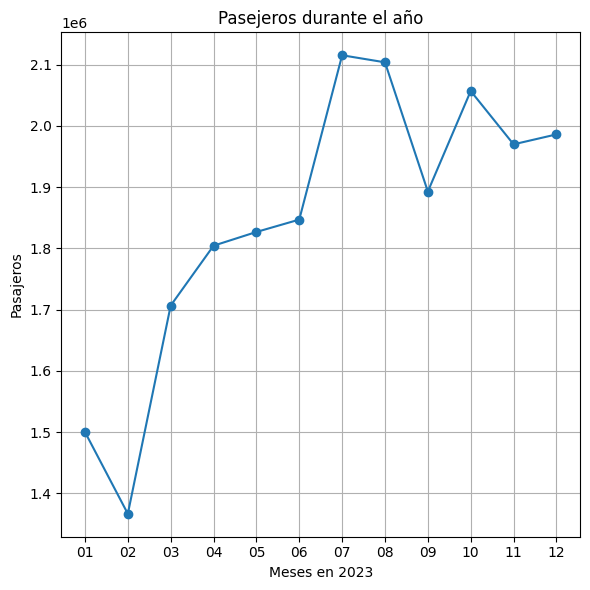

In [16]:
plt.figure(figsize=(6, 6))
plt.plot(sum_passengers_by_month.index, sum_passengers_by_month['Total_Passengers'], marker='o', linestyle='-')
plt.title('Pasejeros durante el año')
plt.xlabel('Meses en 2023')
plt.ylabel('Pasajeros')
plt.grid(True)
plt.tight_layout()
plt.show()

In [17]:
Flights['STD'] = pd.to_datetime(Flights['STD'])
Flights['Week'] = Flights['STD'].dt.strftime('%Y-%U-%w')
#sum_passengers_by_week = Flights.groupby('Week')['Passengers'].sum().reset_index()
#sum_passengers_by_week.set_index('Week', inplace=True)

In [18]:
Flights['TimeD'] = pd.to_datetime(Flights['TimeD'])
Flights['TimeD'] = Flights['TimeD'].dt.hour

Flights['TimeA'] = pd.to_datetime(Flights['TimeA'])
Flights['TimeA'] = Flights['TimeA'].dt.hour

Flights['TimeA']

<ipython-input-18-348261f67cea>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Flights['TimeD'] = pd.to_datetime(Flights['TimeD'])
<ipython-input-18-348261f67cea>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Flights['TimeA'] = pd.to_datetime(Flights['TimeA'])


0         14
1          4
3         15
4          9
5         18
          ..
245718    10
245745    13
245747    15
245748    14
245750    16
Name: TimeA, Length: 121628, dtype: int32

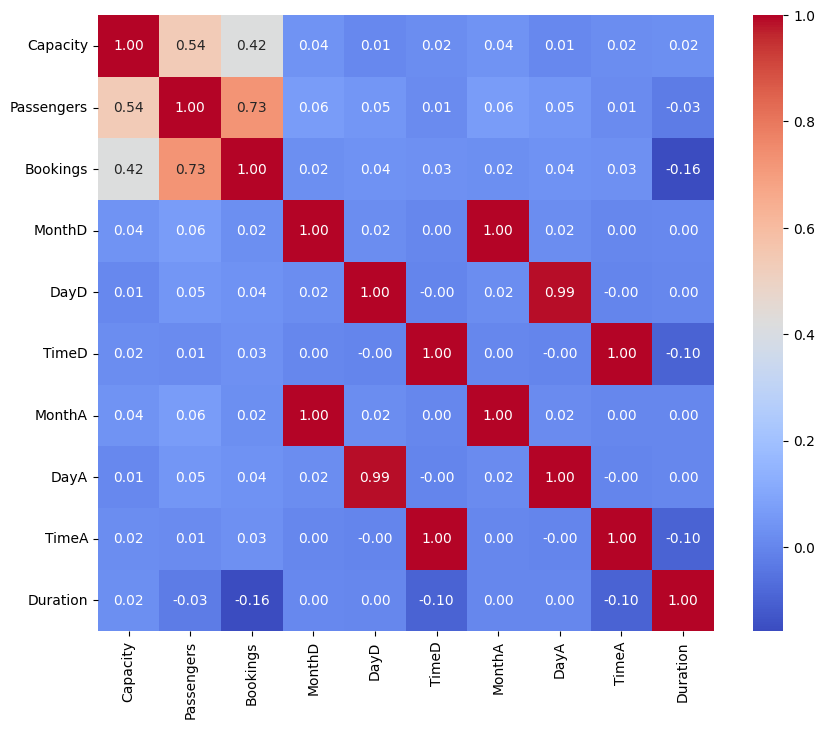

In [19]:

Flights['TimeD'] = Flights['TimeD'].astype(int)
Flights['TimeA'] = Flights['TimeD'].astype(int)


selected_columns = ['Capacity', 'Passengers', 'Bookings', 'MonthD', 'DayD', 'TimeD', 'MonthA', 'DayA', 'TimeA', 'Duration']
correlation_matrix = Flights[selected_columns].corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.show()

In [20]:
X = Flights[['Bookings', 'Capacity']]
y = Flights['Passengers']
regr = linear_model.LinearRegression()
regr.fit(X, y)
print(regr.coef_)


[0.72961429 0.39978489]


In [21]:
modelo = sm.OLS(y, X).fit()
r_cuadrada = modelo.rsquared
print("R cuadrada:", r_cuadrada)

R cuadrada: 0.9846629823872698


In [22]:
valores_t = modelo.tvalues
print("Valores t:", valores_t)



Valores t: Bookings    303.674864
Capacity    349.378711
dtype: float64


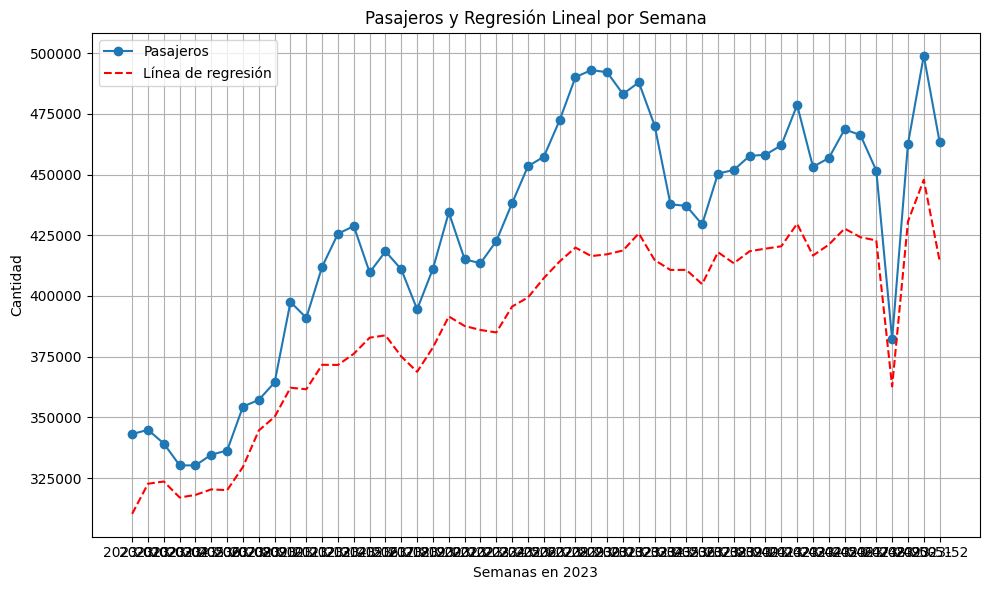

In [23]:

coeficientes = regr.coef_
intercepto = regr.intercept_
Flights['STD'] = pd.to_datetime(Flights['STD'])
Flights['Week'] = Flights['STD'].dt.strftime('%Y-%U')
#sum_passengers_by_week = Flights.groupby('Week')['Passengers'].sum().reset_index()
#sum_passengers_by_week.set_index('Week', inplace=True)

sum_capacidad_por_semana = Flights.groupby('Week')['Capacity'].sum()
sum_reservaciones_por_semana = Flights.groupby('Week')['Bookings'].sum()
sum_pasajeros_por_semana = Flights.groupby('Week')['Passengers'].sum()

data = {
    'Capacity': sum_capacidad_por_semana,
    'Bookings': sum_reservaciones_por_semana,
    'Passengers': sum_pasajeros_por_semana
}
df_semanal = pd.DataFrame(data)
df_semanal = df_semanal.iloc[:-1]
linea_regresion_semanal = coeficientes[0] * df_semanal['Bookings'] + coeficientes[1] * df_semanal['Capacity'] + intercepto

plt.figure(figsize=(10, 6))
plt.plot(df_semanal.index, df_semanal['Passengers'], marker='o', linestyle='-', label='Pasajeros')
plt.plot(df_semanal.index, linea_regresion_semanal, color='red', linestyle='--', label='Línea de regresión')
plt.title('Pasajeros y Regresión Lineal por Semana')
plt.xlabel('Semanas en 2023')
plt.ylabel('Cantidad')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [24]:
#Flights['STD'] = pd.to_datetime(Flights['STD'])
Flights['DayOfYear'] = Flights['STD'].dt.dayofyear
sum_capacidad_por_dia = Flights.groupby('DayOfYear')['Capacity'].sum()
sum_reservaciones_por_dia = Flights.groupby('DayOfYear')['Bookings'].sum()
sum_pasajeros_por_dia = Flights.groupby('DayOfYear')['Passengers'].sum()

data = {
    'Capacity': sum_capacidad_por_dia,
    'Bookings': sum_reservaciones_por_dia,
    'Passengers': sum_pasajeros_por_dia
}
df_diario = pd.DataFrame(data)
df_diario

#sum_passengers_by_day = Flights.groupby('DayOfYear')['Passengers'].sum().reset_index()
#plt.figure(figsize=(10, 6))
#plt.plot(sum_passengers_by_day['DayOfYear'], sum_passengers_by_day['Passengers'], marker='o', linestyle='-')
#plt.title('Pasajeros por día en 2023')
#plt.xlabel('Día del año')
#plt.ylabel('Pasajeros')
#plt.grid(True)
#plt.tight_layout()
#plt.show()

,Capacity,Bookings,Passengers
DayOfYear,,,
2,72272,36812.0,63973.0
3,70132,36087.0,60993.0
4,67608,33923.0,57310.0
5,64986,30845.0,52861.0
6,71248,33276.0,56779.0
...,...,...,...
361,82306,39823.0,69968.0
362,81466,38343.0,68674.0
363,86702,42579.0,73887.0


In [25]:
df_diario

,Capacity,Bookings,Passengers
DayOfYear,,,
2,72272,36812.0,63973.0
3,70132,36087.0,60993.0
4,67608,33923.0,57310.0
5,64986,30845.0,52861.0
6,71248,33276.0,56779.0
...,...,...,...
361,82306,39823.0,69968.0
362,81466,38343.0,68674.0
363,86702,42579.0,73887.0


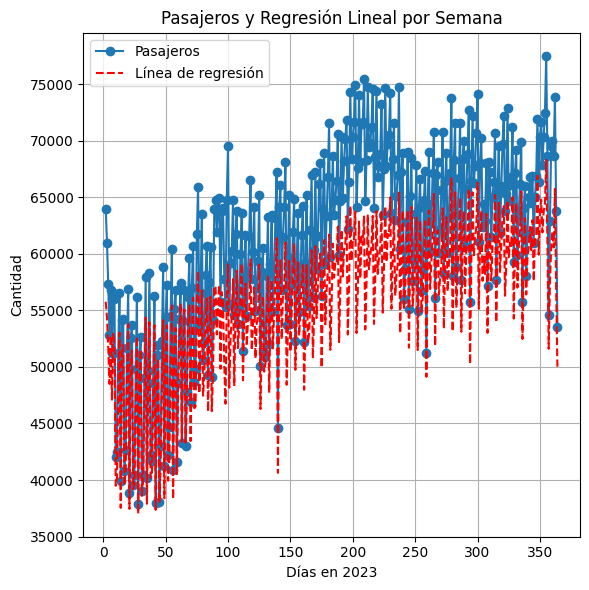

In [26]:
def ajustar_dataframe(df):
    df.drop(343, inplace=True)
    df.index = df.index.map(lambda x: x - 1 if x >= 344 else x)
    return df
ajustar_dataframe(df_diario)


linea_regresion_diario = coeficientes[0] * df_diario['Bookings'] + coeficientes[1] * df_diario['Capacity'] + intercepto

plt.figure(figsize=(6, 6))
plt.plot(df_diario.index, df_diario['Passengers'], marker='o', linestyle='-', label='Pasajeros')
plt.plot(df_diario.index, linea_regresion_diario, color='red', linestyle='--', label='Línea de regresión')
plt.title('Pasajeros y Regresión Lineal por Semana')
plt.xlabel('Días en 2023')
plt.ylabel('Cantidad')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [27]:
ts = df_diario.index

result = adfuller(ts)
print('Estadística ADF:', result[0])
print('Valor p:', result[1])
print('Valores críticos:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

Estadística ADF: -16.399070187546165
Valor p: 2.6489684369635054e-29
Valores críticos:
	1%: -3.4494474563375737
	5%: -2.8699542285903887
	10%: -2.5712527305187987


La H_0 se rechaza, por lo que no hay evidencia de que esta serie es no estacionaria.

In [28]:
df_diario.index = pd.to_datetime(df_diario.index, format='%j')

df_diario.set_index(df_diario.index, inplace=True)

# Aplicar la descomposición estacional
decomposition = sm.tsa.seasonal_decompose(df_diario['Passengers'], model='additive')

# Obtener las componentes de tendencia, estacionalidad y residuos
tendencia = decomposition.trend
estacionalidad = decomposition.seasonal
residuos = decomposition.resid

#decomposition = sm.tsa.seasonal_decompose(df_diario, model='additive')
#tendencia = decomposition.trend
#estacionalidad = decomposition.seasonal
#residuos = decomposition.resid

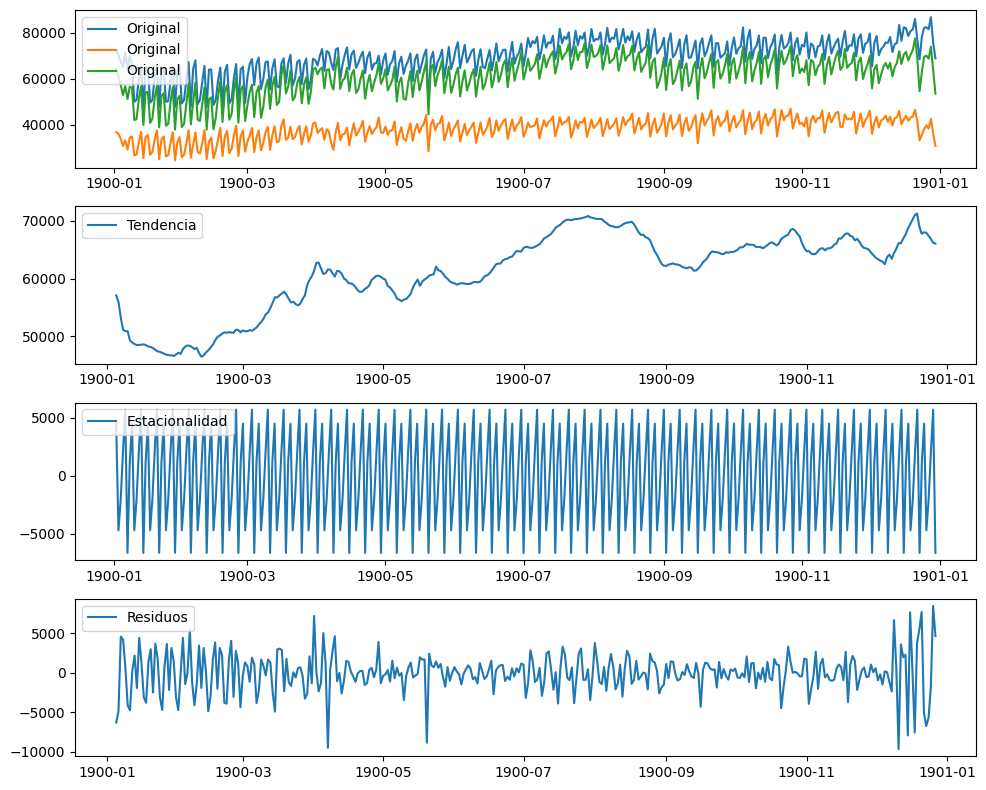

In [29]:
plt.figure(figsize=(10, 8))
plt.subplot(411)
plt.plot(df_diario, label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(tendencia, label='Tendencia')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(estacionalidad, label='Estacionalidad')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residuos, label='Residuos')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     499.8
Date:                Sun, 05 May 2024   Prob (F-statistic):           4.13e-70
Time:                        16:56:45   Log-Likelihood:                -3581.2
No. Observations:                 363   AIC:                             7166.
Df Residuals:                     361   BIC:                             7174.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.163e+04    489.413    105.486      0.0

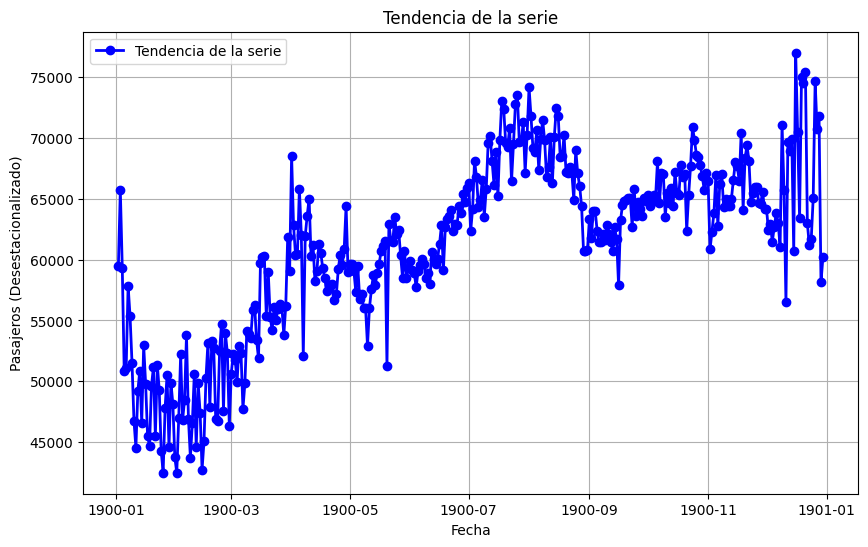

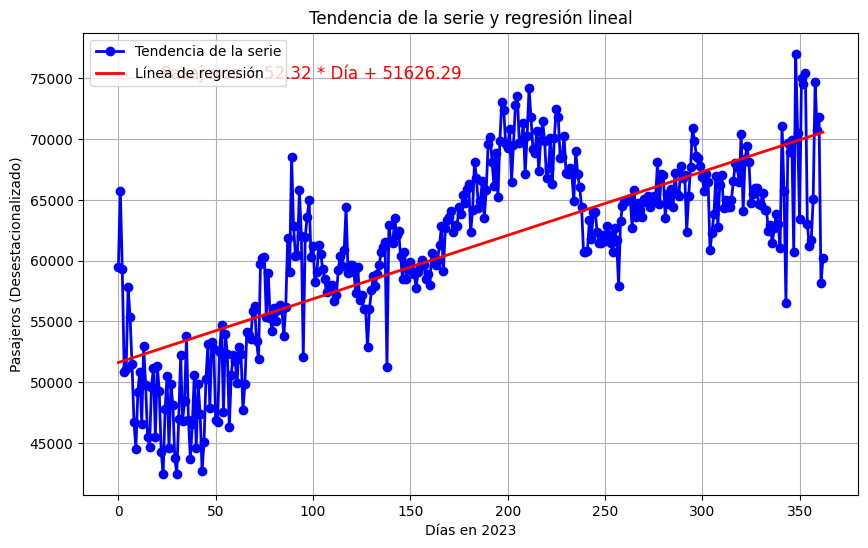

In [30]:
# Desestacionalizar la serie
y1 = df_diario['Passengers'] - estacionalidad

# Graficar la tendencia de la serie desestacionalizada
plt.figure(figsize=(10, 6))
plt.plot(df_diario.index, y1, marker='o', linestyle='-', color='blue', lw=2, label='Tendencia de la serie')
plt.title('Tendencia de la serie')
plt.xlabel('Fecha')
plt.ylabel('Pasajeros (Desestacionalizado)')
plt.legend()
plt.grid(True)

# Ajustar la regresión lineal a la tendencia desestacionalizada
t2 = np.arange(len(y1))
X = sm.add_constant(t2)
regresion = sm.OLS(y1, X).fit()

# Imprimir el resumen de la regresión
print(regresion.summary())

# Graficar la tendencia de la serie desestacionalizada y la regresión lineal
plt.figure(figsize=(10, 6))
plt.plot(t2, y1, marker='o', linestyle='-', color='blue', lw=2, label='Tendencia de la serie')
plt.plot(t2, regresion.fittedvalues, color='red', lw=2, label='Línea de regresión')
plt.title('Tendencia de la serie y regresión lineal')
plt.xlabel('Días en 2023')
plt.ylabel('Pasajeros (Desestacionalizado)')
plt.legend()
plt.grid(True)
equation_text = f'Pasajeros = {regresion.params[1]:.2f} * Día + {regresion.params[0]:.2f}'
plt.text(0.1, 0.9, equation_text, fontsize=12, transform=plt.gca().transAxes, color='red')

plt.show()